$
\newcommand{\pdv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ipdv}[2]{\partial #1/\partial #2}
\newcommand{\dd}[1]{\,\textit{d}#1\,}
\newcommand{\softmax}[1]{\Softmax\left(#1\right)}
\newcommand{\smax}[1]{\Smax\left(#1\right)}
\newcommand{\exp}[1]{e^{#1}}
\newcommand{\grad}{\nabla}
\newcommand{\R}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\idm}{\mathbb{1}}  % \idm identity matrix
\DeclareMathOperator{\Softmax}{softmax}
\DeclareMathOperator{\Smax}{smax}
\DeclareMathOperator{\relu}{ReLU}
\DeclareMathOperator{\mat}{Mat}
\DeclareMathOperator{\GL}{GL}
\DeclareMathOperator{\SL}{SL}
\DeclareMathOperator{\diag}{diag}
\DeclareMathOperator{\sgn}{sgn}
\DeclareMathOperator{\lexp}{exp}
$

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lets-prepare-our-data" data-toc-modified-id="Lets-prepare-our-data-1">Lets prepare our data</a></span><ul class="toc-item"><li><span><a href="#One-example-by-column" data-toc-modified-id="One-example-by-column-1.1">One example by column</a></span></li><li><span><a href="#Flattening-images" data-toc-modified-id="Flattening-images-1.2">Flattening images</a></span></li><li><span><a href="#Standardize-data-to-have-feature-values-between-0-and-1" data-toc-modified-id="Standardize-data-to-have-feature-values-between-0-and-1-1.3">Standardize data to have feature values between 0 and 1</a></span></li><li><span><a href="#Check-the-shapes" data-toc-modified-id="Check-the-shapes-1.4">Check the shapes</a></span></li><li><span><a href="#One-hot-encoding-the-labels-vectors" data-toc-modified-id="One-hot-encoding-the-labels-vectors-1.5">One hot encoding the labels vectors</a></span></li><li><span><a href="#Final-check-of-shapes" data-toc-modified-id="Final-check-of-shapes-1.6">Final check of shapes</a></span></li></ul></li><li><span><a href="#Defining-the-model,-i.e.-the-NN-architecture" data-toc-modified-id="Defining-the-model,-i.e.-the-NN-architecture-2">Defining the model, i.e. the NN architecture</a></span></li><li><span><a href="#Initializing-the-parameters" data-toc-modified-id="Initializing-the-parameters-3">Initializing the parameters</a></span></li><li><span><a href="#Defining-activation-functions" data-toc-modified-id="Defining-activation-functions-4">Defining activation functions</a></span></li><li><span><a href="#Forward-Propagation" data-toc-modified-id="Forward-Propagation-5">Forward Propagation</a></span></li><li><span><a href="#Computing-the-current-Cost" data-toc-modified-id="Computing-the-current-Cost-6">Computing the current Cost</a></span></li><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-7">Backpropagation</a></span></li></ul></div>

# Building a Deep Neural Network
<hr>

A DNN can be decomposed as the following sequence of operations:
* Input Data
* Forward Propagation to obtain an Output Data
* Evaluate Output Data (compute current Cost)
* Given current Cost, do Back-propagation to update weights
* Repeat from beggining with updated weights

In [1]:
%%capture
%run shapesdata.ipynb

# Loading the data (circle, square and triangle drawings)
train_x_orig, train_y_orig, test_x_orig, test_y_orig, _, _ = load_data()

This is a ['triangle']


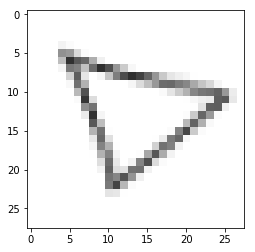

In [2]:
# Example of a drawing and its label
print_img(train_x_orig, train_y_orig, 12)

In [3]:
# Lets see what are the shapes of our variables
print("train_x_orig: {}".format(train_x_orig.shape))
print("train_y_orig: {}".format(train_y_orig.shape))
print("test_x_orig: {}".format(test_x_orig.shape))
print("test_y_orig: {}".format(test_y_orig.shape))

train_x_orig: (270, 28, 28, 3)
train_y_orig: (270, 1)
test_x_orig: (30, 28, 28, 3)
test_y_orig: (30, 1)


## Lets prepare our data

### One example by column
We can arrange our example either by rows or by columns. Here we choose to arrange them by columns.

### Flattening images
First, we need to flatten our images, since they are actually arrays and we want them to be vectors. Our **train_x_orig** and **test_x_orig** variables are arrays with shape **(210, 28, 28, 3)**, where the first number stands for the number of examples we have in the set and the remaining three number are a single image array. We want them to be arrays of shape **(28\*28\*3, 210)**, so we use numpy's reshape method.

In [4]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

### Standardize data to have feature values between 0 and 1

In [5]:
train_x = train_x_flatten/255
test_x = test_x_flatten/255

### Check the shapes

In [6]:
print("train_x: {}".format(train_x.shape))
print("test_x: {}".format(test_x.shape))

train_x: (2352, 270)
test_x: (2352, 30)


### One hot encoding the labels vectors
Our **train_y_orig** and **test_y_orig** variables are arrays with shape **(210, 1)**, i.e. column vectors, and to each example there is an associate class indicated by a string, i.e. 'circle'. However, we want this classes to be indicated by numbers and the best way to do that is by a process called **one hot encoding**:
* We define a vector whose each component corresponds to a class, and we indicate that our example belongs to a certain class by filling this vector with zeros except for the corresponding class component, which we fill with 1.
* To each example, then, we associate one of this vectors.

After one hot encoding train_y_orig and test_y_orig we should have labels vectors **train_y** and **test_y** of shape **(3, 210)** and **(3, 90)**.

In [7]:
def onehotencode(y):
    
    classes = np.unique(y)
    
    one_hot_y = np.zeros((y.shape[0], len(classes)))
    
    for i, item in enumerate(y):
#         print(i, item)
        one_hot_y[i] = item == classes

    one_hot_y = one_hot_y.T
    
    return one_hot_y

train_y = onehotencode(train_y_orig)
test_y = onehotencode(test_y_orig)

### Final check of shapes

In [8]:
# Lets see what are the new shapes of our variables
print("train_x: {}".format(train_x.shape))
print("train_y: {}".format(train_y.shape))
print("test_x: {}".format(test_x.shape))
print("test_y: {}".format(test_y.shape))

train_x: (2352, 270)
train_y: (3, 270)
test_x: (2352, 30)
test_y: (3, 30)


## Initializing the parameters

In [37]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
                  including the dimension of the input and the output
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(42)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network


    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters


## Defining activation functions

In [38]:
def relu(x):
    r = np.maximum(0,x) + 0.01*np.minimum(0,x)  
    return r

def softmax(x):
    
    x_exp = np.exp(x)
    
    x_sum = np.sum(x_exp, axis = 0, keepdims = True)
    
    s = x_exp/x_sum
    
    return s

## Forward Propagation

We know that when going from the layer $l-1$ to the layer $l$ we do the following:
\begin{equation}
    Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]},
\end{equation}
then
\begin{equation}
    A^{[l]} = g^{[l]}(Z^{[l]}),
\end{equation}
so let's write a code to perform this steps, bearing in mind that we will use them inside the main iteration loop.

* Lets denote $A^{[l-1]}$ by **A_prev**

In [39]:
def step_forward(A_prev, W, b, activation_function = "relu"):
    """
    Implement a layer's forward propagation step.

    Arguments:
        A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
        W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
        A -- activation 
        cache -- a python dictionary containing "A_prev", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    # Compute pre-activation output
    Z = W @ A_prev + b 
    
    # Check the dimensions of Z
    assert(Z.shape == (W.shape[0], A_prev.shape[1])) 
    
    if activation_function == 'relu':
        A = relu(Z)
        
    if activation_function == 'softmax':
        A = softmax(Z)
        
    assert (A.shape == Z.shape) # This line checks the dimensions of A, which should be the same as of Z

    cache = (A_prev, W, b, Z)
    
    return A, cache

In [40]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- parameters dictionary
    hidden_activ_func -- relu, tanh
    last_activ_func -- softmax, sigmoid
    
    Returns:
    AL -- last post-activation output
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    caches = []
    
    A = X
    L = len(parameters) // 2     # number of layers in the neural network
    
    for l in range(1, L): # l = 1,..., L-1
        A_prev = A
        W = parameters["W"+str(l)]
        b = parameters["b"+str(l)]
        
        A, cache = step_forward(A_prev, W, b, 'relu')
        
        caches.append(cache)
        
    A_prev = A
    W = parameters["W"+str(L)]
    b = parameters["b"+str(L)]
    
    AL, cache = step_forward(A_prev, W, b, 'softmax')
        
    caches.append(cache)
                
    return AL, caches


## Computing the current Cost

In [41]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    # Compute loss from AL and y.
    R = Y*np.log(AL)
    loss = (-1)*np.sum(R, axis = 0, keepdims = True) # Computes the loss for each example
        
    assert(loss.shape == (1,Y.shape[1]))
    
    cost = (1/M)*np.sum(loss)
    
    cost = np.squeeze(cost) # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    assert(cost.shape == ())
    
    return cost

## Backpropagation

In [16]:
def relu_derivative(z):
    x = np.zeros(z.shape)
    x[z > 0] = 1
    x[z <= 0] = 0.01
    return x

In [42]:
def backward_step(dA, A_prev, W, b, Z, activation_function = "relu"):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
        
    if activation_function == 'relu':
        dZ = np.multiply(dA, relu_derivative(Z))
        
    if activation_function == 'softmax':
        dZ = np.multiply(dA,softmax(Z)) - np.diag(dA.T @ softmax(Z))*softmax(Z)
        
    dW = (dZ @ A_prev.T)
    
    db = np.sum(dZ, axis = 1, keepdims = True)
    
    dA_prev = W.T @ dZ
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [43]:
def backward_propagation(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    M = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = (1/M)*(-Y/AL)
        
    dA = dAL
    
    A_prev, W, b, Z = caches[L-1]
    
    dA_prev, dW, db = backward_step(dA, A_prev, W, b, Z, 'softmax')
    
    grads["dA" + str(L-1)] = dA_prev
    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(0, L-1)):   # Note that the first value "l" takes is L-2 
        
        dA = grads["dA" + str(l+1)]  # Note that the first index used is "l+1" = L-1, whish follows the L we already used
        A_prev, W, b, Z = caches[l]
    
        dA_prev, dW, db = backward_step(dA, A_prev, W, b, Z, 'relu')

        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l+1)] = dW
        grads["db" + str(l+1)] = db

    return grads


In [19]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    # number of layers in the neural network
    L = len(parameters) // 2 

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
            
            
    return parameters


In [50]:
def deep_model(X,
               Y,
               dev_x, 
               dev_y, 
               layers_dims, 
               learning_rate = 0.01, 
               num_iterations = 3000, 
               print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(42)
    train_errors = []                         # keep track of train error
    test_errors = []                          # keep track of train error
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        AL, caches = forward_propagation(X, parameters)
        
        dev_AL, _ = forward_propagation(dev_x, parameters)
        
        # Compute cost.
        train_error = compute_cost(AL, Y)
        
        test_error = compute_cost(dev_AL, dev_y)
    
        # Backward propagation.
        grads = backward_propagation(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, train_error))
        if print_cost and i % 10 == 0:
            train_errors.append(train_error)
        if print_cost and i % 10 == 0:
            test_errors.append(test_error)
        
    # plot the cost
#     plt.plot(np.squeeze(train_errors))
    plt.plot(np.squeeze(test_errors))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [21]:
def predict(X, parameters):
    
    Yhat, _ = forward_propagation(X, parameters)
    
    pred = np.zeros(Yhat.shape).T
    
    for m in range(Yhat.shape[1]):
        pred[m][np.argmax(Yhat.T[m], axis = 0)] = 1
    return pred.T

In [22]:
def check_right(train_y, train_pred):
    
    prod = train_y*train_pred
        
    ans = np.logical_and(*(train_pred == train_y))
    
    ans = ans[np.newaxis, :]
    
    return ans


In [23]:
def get_score(X, y_true, parameters):
    pred = predict(X, parameters)
    isright = check_right(y_true, pred)
    a = np.unique(isright, return_counts=True)
    if len(a[1]) == 2:
        percen_wrong = a[1][0]/np.sum(a[1])
        percen_right = a[1][1]/np.sum(a[1])
    else:
        percen_right = 1
    return percen_right

Cost after iteration 0: 1.216688
Cost after iteration 100: 1.053543
Cost after iteration 200: 1.028952
Cost after iteration 300: 1.003631
Cost after iteration 400: 0.978725
Cost after iteration 500: 0.953525
Cost after iteration 600: 0.927945


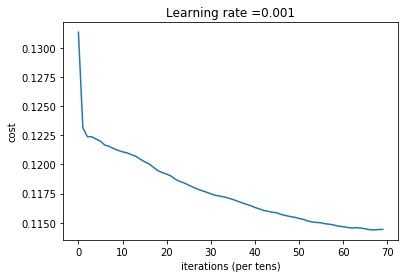

With 700 iteration, the model achieved a 64.44444444444444% accuracy on the train set.
With 700 iteration, the model achieved a 53.333333333333336% accuracy on the test set.




In [53]:
M = train_x.shape[1]                     # Number of examples

n_x = train_x.shape[0]                   # Number of features

C = 3                                    # Number of classes

hidden_layers = [50, 50, 50, 50]         # Number of hidden layers and their respective size

layer_dims = [n_x, *hidden_layers, C]    # Neural Network Architecture

num_iter = 700

trained_parameters = deep_model(
    train_x, 
    train_y, 
    test_x,
    test_y,
    layer_dims,
    learning_rate = 0.001, 
    num_iterations = num_iter, 
    print_cost=True)

acc_train = get_score(train_x, train_y, trained_parameters)
acc_test = get_score(test_x, test_y, trained_parameters)

print("With {} iteration, the model achieved a {}% accuracy on the train set.".format(num_iter, acc_train*100))
print("With {} iteration, the model achieved a {}% accuracy on the test set.".format(num_iter, acc_test*100))
print("\n")